In [30]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('college_food.csv')

In [3]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [4]:
pd.set_option('display.max_rows', 10)
df['weight']


0                           187
1                           155
2      I'm not answering this. 
3                 Not sure, 240
4                           190
                 ...           
120                         156
121                         180
122                         120
123                         135
124                         135
Name: weight, Length: 125, dtype: object

In [8]:
def cleaning_col(column,type,data):
    my_array = []
    for i in data[column]:
        try:
            temp = type(i)
            my_array.append(temp)
        except ValueError:
            temp = np.nan
            my_array.append(temp)
    data[column] = my_array

In [9]:
cleaning_col('GPA',float,df)
cleaning_col('weight',int,df)

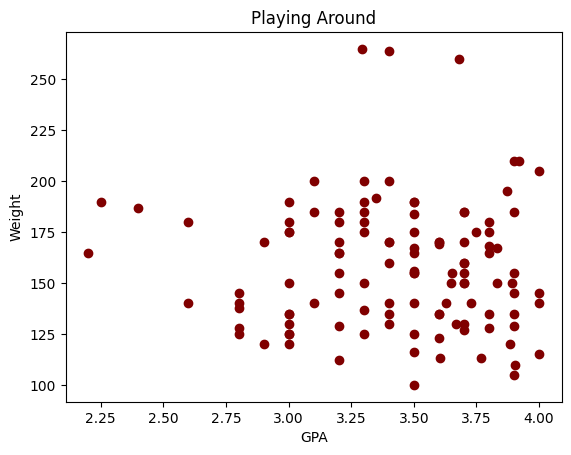

In [10]:
plt.scatter(df['GPA'], df['weight'], color='maroon', marker='o', label='Scatter Plot')
plt.xlabel('GPA')
plt.ylabel('Weight')
plt.title('Playing Around')
plt.show()

In [11]:
df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.0
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.0
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,NaN
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,NaN
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.500,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156.0
121,3.000,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180.0
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120.0
123,3.000,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135.0


In [13]:
min(df['GPA'])

2.2

In [63]:
df['letter_grade_average']=np.nan
for i in range(125):
    if df['GPA'][i] >= 3.7:
        df['letter_grade_average'][i] = 'A'
    elif df['GPA'][i] >= 2.7:
        df['letter_grade_average'][i] = 'B'
    else:
        df['letter_grade_average'][i] = 'C'

/var/folders/hy/hwlrhj2n5c369l2kzn32jhkw0000gn/T/ipykernel_53646/253186710.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['letter_grade_average'][i] = 'C'


<Axes: xlabel='exercise', ylabel='count'>

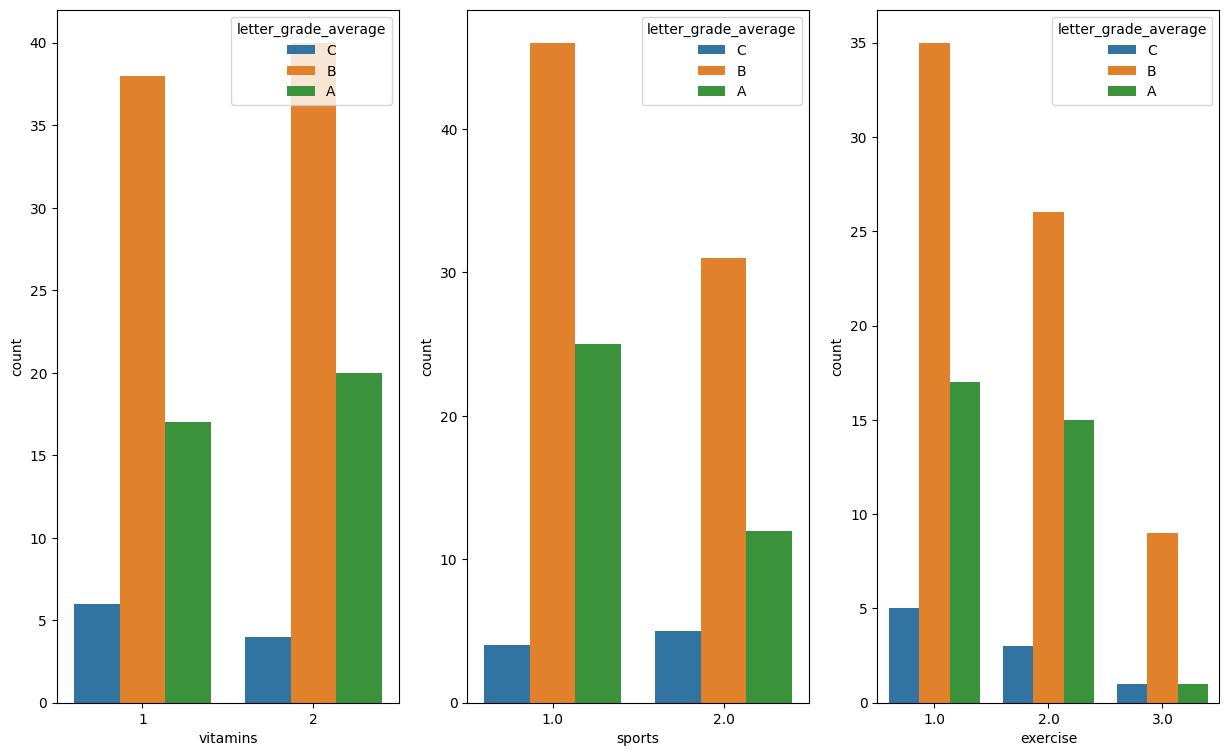

In [64]:
fig, axes = plt.subplots(1, 3, figsize = (15, 9))

sns.countplot(data=df, x=df["vitamins"], hue= df["letter_grade_average"],ax=axes[0])
sns.countplot(data=df, x=df["sports"], hue = df["letter_grade_average"], ax=axes[1])
sns.countplot(data=df, x=df["exercise"], hue=df["letter_grade_average"])

In [33]:
def to_vector_of_strings(dataframe, column_name):
    # Split words using commas and periods
    words_list = dataframe[column_name].str.lower().str.replace('.', ',').str.split(',').explode().str.strip().tolist()
    # Create a new DataFrame with a row for each word
    vector_of_words = pd.DataFrame({
        '{}_word'.format(column_name): words_list
    })
    
    return vector_of_words

comfort_food = to_vector_of_strings(df,"comfort_food")

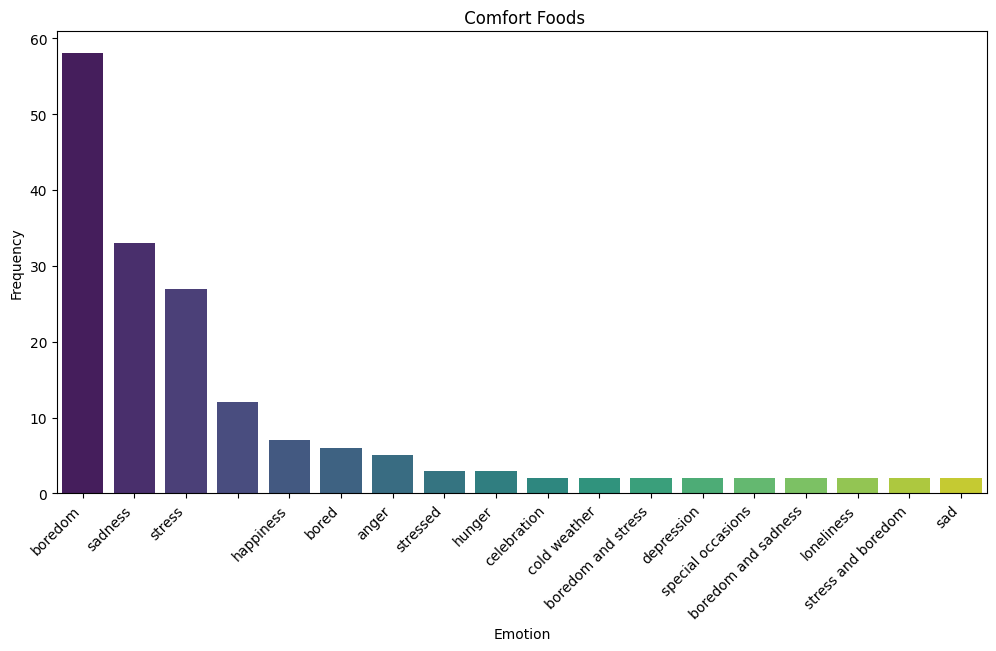

In [34]:
comfort_food_reasons = to_vector_of_strings(df, "comfort_food_reasons")
comfort_food_reasons

# Count the occurrences of each reason
reasons_counts = comfort_food_reasons['comfort_food_reasons_word'].value_counts()
# Filter reasons that occur more than once and reset the index
reasons_filtered = reasons_counts[reasons_counts > 1].reset_index(name='count')
reasons_filtered

plt.figure(figsize=(12, 6))
sns.barplot(x="comfort_food_reasons_word", y= "count", data=reasons_filtered, palette="viridis")
plt.title(' Comfort Foods')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

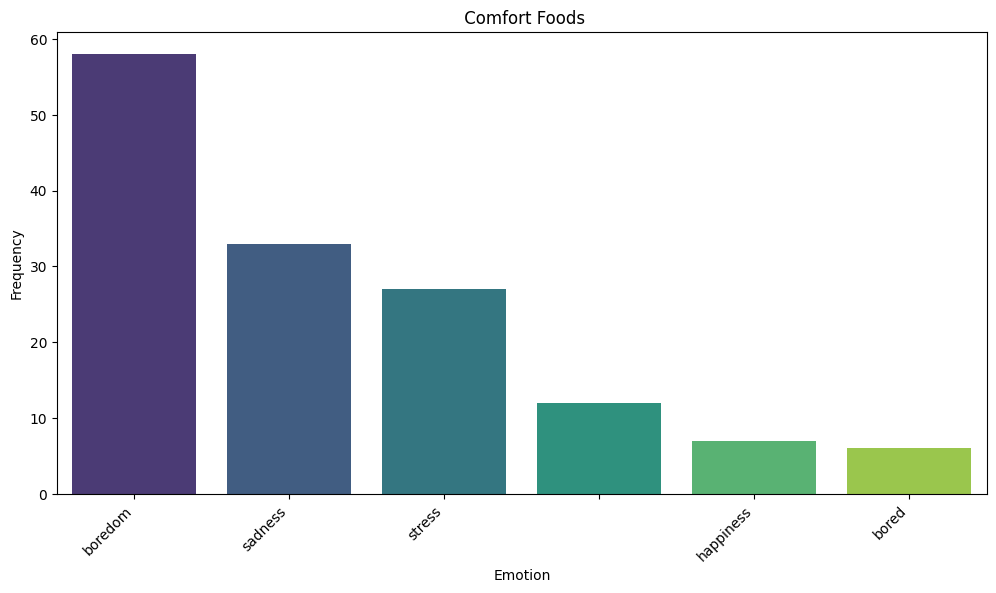

In [35]:
temp = reasons_counts[reasons_counts > 5].reset_index(name='count')
temp

plt.figure(figsize=(12, 6))
sns.barplot(x="comfort_food_reasons_word", y= "count", data=temp, palette="viridis")
plt.title(' Comfort Foods')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

<Axes: xlabel='exercise', ylabel='count'>

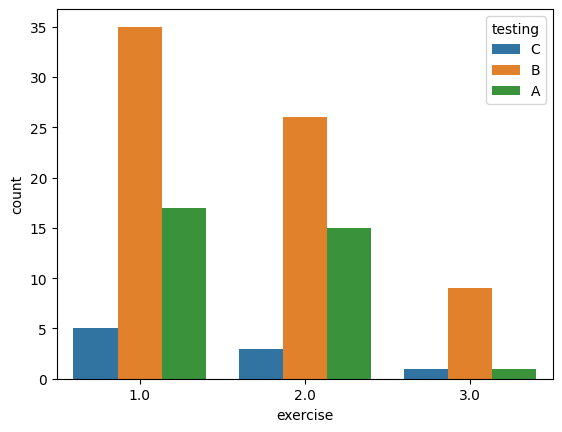

In [39]:
temp = reasons_counts[reasons_counts > 5].reset_index(name='count')

sns.countplot(data=temp, x=temp["comfort_food_reasons_word"], hue= temp["testing"],ax=axes[0])
sns.countplot(data=df, x=df["sports"], hue = df["testing"], ax=axes[1])
sns.countplot(data=df, x=df["exercise"], hue=df["testing"])

In [67]:
new = df.loc[:,['GPA','Gender','calories_day','comfort_food','comfort_food_reasons','cook','eating_out','employment','exercise','letter_grade_average','sports','vitamins','weight']]

In [69]:
new.to_csv('food_cleaned.csv', index=False)
